# **Electroencephalography (EEG) signals**
* OpenML -->  benchmark datasets and a website for comparison
of machine learning algorithms. 
* The scikit-learn library --> an interface to
OpenML that shows fetch data from OpenML.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.datasets import fetch_openml

In [2]:
eeg = fetch_openml(data_id=1471, as_frame=True)
# https://www.openml.org/d/1471
# the whole measurement spans 117 seconds

In [3]:
increment = 117 / len(eeg['data'])
fs = len(eeg['data']) // 117

In [4]:
len(eeg['data'])

14980

In [5]:
import numpy as np
index = np.linspace(
    start=0,
    stop=increment*len(eeg['data']),
    num=len(eeg['data'])
)

ts_index = pd.to_datetime(index, unit='s')
v1 = pd.Series(name='V1', data=eeg['data']['V1'].values, index=ts_index)

* Slice the dataset directly. Note that the DatetimeIndex is anchored in 1970.
* This slicing avoids an artifact, a strong spike, occurring at around 1:20.

In [6]:
slicing = (v1.index >= '1970-01-01 00:00:08') & (v1.index <='1970-01-01 00:01:10.000000000')
v1[slicing]

1970-01-01 00:00:08.006208692    4289.74
1970-01-01 00:00:08.014019627    4284.10
1970-01-01 00:00:08.021830563    4280.00
1970-01-01 00:00:08.029641498    4289.74
1970-01-01 00:00:08.037452433    4298.46
                                  ...   
1970-01-01 00:01:09.962547567    4289.74
1970-01-01 00:01:09.970358502    4283.08
1970-01-01 00:01:09.978169437    4284.62
1970-01-01 00:01:09.985980373    4289.23
1970-01-01 00:01:09.993791308    4290.77
Name: V1, Length: 7937, dtype: float64

The plot of the EEG signal over time.

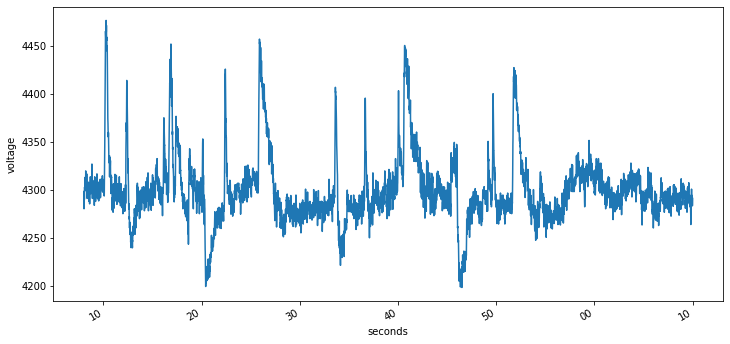

In [7]:
date_formatter = DateFormatter("%S")
ax = v1[slicing].plot(figsize=(12, 6))
ax.xaxis.set_major_formatter(date_formatter)
plt.ylabel('voltage')
plt.xlabel('seconds');

* Resample the data to look at the series more coarsely.
* This is the graph with three subplots we get from resampling to frequencies of 1 second, 2 seconds, and 5 seconds, respectively

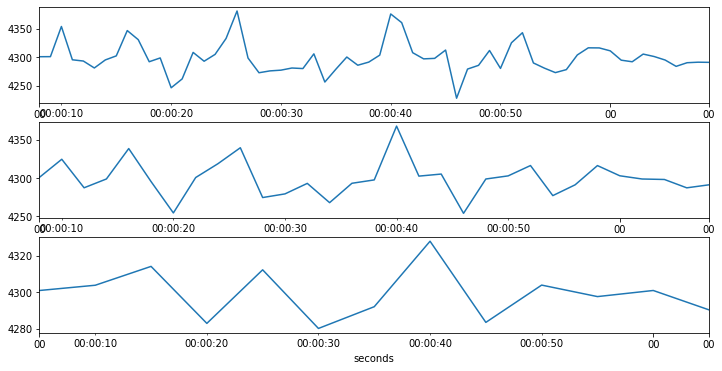

In [8]:
plt.subplot(311)
ax1 = v1[slicing].resample('1s').mean().plot(figsize=(12, 6))
ax1.xaxis.set_major_formatter(date_formatter)
plt.subplot(312)
ax1 = v1[slicing].resample('2s').mean().plot(figsize=(12, 6))
ax1.xaxis.set_major_formatter(date_formatter)
plt.subplot(313)
ax2 = v1[slicing].resample('5s').mean().plot(figsize=(12, 6))
ax2.xaxis.set_major_formatter(date_formatter)
plt.xlabel('seconds');

Apply the Welch method and the discrete Fourier transform for determining cyclic activity on a plot of spectral density.


In [9]:
from scipy import signal
f, Pxx_den = signal.welch(
    v1[slicing].values,
    fs,
    nperseg=4000,
    scaling='spectrum'
)

The spectral density plot (the periodogram).

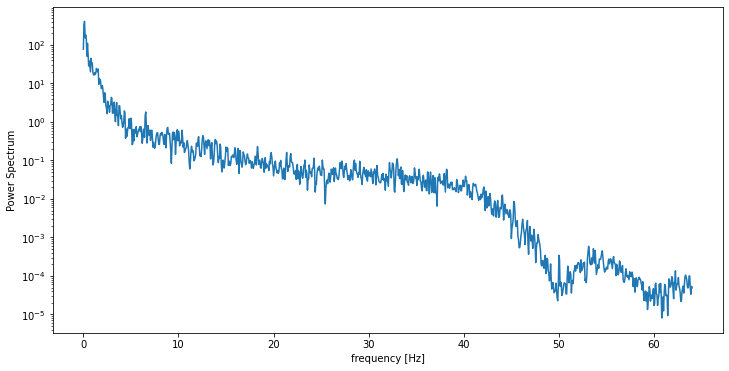

In [10]:
from scipy import signal
f, Pxx_den = signal.welch(
    v1[slicing].values,
    fs,
    nperseg=2048,
    scaling='spectrum'
)
plt.figure(figsize=(12, 6))
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('Power Spectrum');